In [1]:
from datetime import datetime
import os
import json
best_results = {}  # 用于保存最佳参数
result_dir="./results"
best_results = {
    'dname': {
        'alpha': 0.01,
        'lr': 0.001,
        'test_acc': 56.1
    },
}
if not os.path.exists(result_dir):
    os.makedirs(result_dir)
timestamp = datetime.now().strftime('%m%d_%H%M%S')  # 例如：20231126_144500
best_res_log_filename = os.path.join(result_dir, f'best_res_log_{timestamp}.txt')
with open(best_res_log_filename, 'w') as f:
    json.dump(best_results, f, indent=4)

In [1]:
import math
from scipy.stats import norm

# 参数设置
mu = 3.5
sigma_single = math.sqrt(35 / 12)
margin = 0.035
confidence_level = 0.68

# 计算所需的n
z_score = norm.ppf((1 + confidence_level) / 2)
n_min = (z_score * sigma_single / margin) ** 2

print(f"最少需要的掷骰子次数: {math.ceil(n_min)}")

最少需要的掷骰子次数: 2355


In [1]:
import math
from scipy.stats import norm

# 参数设置
mu = 3.5  # 骰子的均值
sigma_single = math.sqrt(35 / 12)  # 单次掷骰子的标准差
margin = 0.035  # 误差范围 1% 的 3.5
confidence_level = 0.68  # 置信度

# 检查置信度是否合理
if not (0 < confidence_level < 1):
    raise ValueError("置信度应在 0 到 1 之间")

# 计算正态分布的 z 分数（置信区间）
z_score = norm.ppf((1 + confidence_level) / 2)

# 计算所需的最小样本数量 n
n_min = (z_score * sigma_single / margin) ** 2

# 输出结果
n_min_ceiled = math.ceil(n_min)  # 取整得到最小整数样本数
print(f"为了保证样本平均值误差不超过 {margin * 100 / mu}% 的概率超过 {confidence_level * 100}%，最少需要掷骰子的次数为: {n_min_ceiled}")


为了保证样本平均值误差不超过 1.0000000000000002% 的概率超过 68.0%，最少需要掷骰子的次数为: 2355


样本平均值与真实平均值的误差不超过 1% 的概率: 0.6809


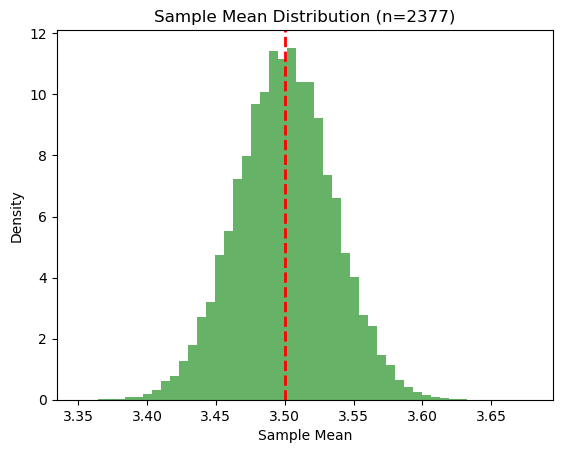

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 设置随机数种子，保证结果可复现
np.random.seed(42)

# 定义参数
mu = 3.5  # 骰子的均值
std_dev = np.sqrt(2.9167)  # 单次掷骰子的标准差
n = 2370  # 计算得到的最小样本数

# 模拟掷骰子
num_simulations = 100000
samples = np.random.randint(1, 7, size=(num_simulations, n))

# 计算每次模拟的样本平均值
sample_means = np.mean(samples, axis=1)

# 计算满足条件的比例
tolerance = 0.01 * mu
within_tolerance = np.abs(sample_means - mu) <= tolerance
probability = np.mean(within_tolerance)

# 输出结果
print(f"样本平均值与真实平均值的误差不超过 1% 的概率: {probability:.4f}")

# 可视化分布
plt.hist(sample_means, bins=50, density=True, alpha=0.6, color='g')
plt.axvline(mu, color='r', linestyle='dashed', linewidth=2)
plt.title('Sample Mean Distribution (n=2377)')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.show()


In [3]:
from utils.LoadDataset_utils import load_dataset
#处理log文件
import os
import glob

def read_best_params(folder_path):
    # 存储每个 dname 对应的最佳 test_acc_mean 和其参数
    best_params = {}

    # 遍历文件夹中的所有文件
    file_list = glob.glob(os.path.join(folder_path, "best_res_log_*"))
    for filename in file_list:
        file_path = os.path.join(folder_path, filename)

        # 如果是文件且符合要求
        if os.path.isfile(file_path):
            with open(file_path, 'r') as file:
                # 读取文件中的每一行
                for line in file:
                    # 解析每一行数据
                    fields = line.strip().split(',')
                    if len(fields) != 9:
                        continue  # 忽略格式不正确的行

                    dname, gnn_name, alpha, lr, weight_decay, train_rate, val_rate, val_acc_mean, test_acc_mean = fields

                    # 将数值转为浮动数，方便比较
                    try:
                        test_acc_mean = float(test_acc_mean)
                        alpha = float(alpha)
                        lr = float(lr)
                        weight_decay = float(weight_decay)
                    except ValueError:
                        continue  # 忽略无法转换为数字的行

                    # 如果 dname 没有记录，或者当前 test_acc_mean 更大，则更新
                    if dname not in best_params or test_acc_mean > best_params[dname]['test_acc_mean']:
                        best_params[dname] = {
                            'test_acc_mean': test_acc_mean,
                            'alpha': alpha,
                            'lr': lr,
                            'weight_decay': weight_decay
                        }

    return best_params

# 例如调用
folder_path = './logs'  # 替换为文件夹路径
best_params = read_best_params(folder_path)

# 输出结果
for dname, params in best_params.items():
    print(f"dname: {dname}, alpha: {params['alpha']}, lr: {params['lr']}, weight_decay: {params['weight_decay']}, test_acc_mean: {params['test_acc_mean']}")


In [1]:
from utils.LoadDataset_utils import load_dataset
    
dname = 'cSBM_-1'
dataset, data = load_dataset(dname)
# 打印加载的图数据集基本信息
print(f"数据集名称：{dname}")
print(f"数据集的图数量：{len(dataset)}")
print(f"图数据的维度：{data.x.shape}")  # 节点特征维度
print(f"图的边数：{data.edge_index.shape[1]}")  # 边的数量
print(f"节点标签的类别数：{dataset.num_classes}")  # 类别数

KeyboardInterrupt: 

Text(0, 0.5, 'Accuracy')

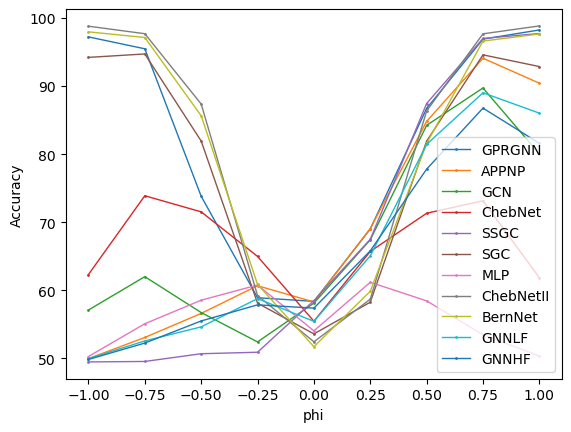

In [5]:
import os
import json
import matplotlib.pyplot as plt
import re
import glob

folder_path = './results/'
acc_data = {}
x = [ -1 , -0.75 , -0.5 , -0.25 , 0 , 0.25 , 0.5 , 0.75 , 1 ]
# 遍历文件夹中的所有文件
file_list = glob.glob(os.path.join(folder_path, "best_res_log_*"))

for file_name in file_list:
    acc_data[file_name] = []
    if file_name.endswith('.txt'):  # 确保是 JSON 文件
        file_path = file_name
        with open(file_path, 'r') as f:
            data = json.load(f)
            #dataset_values = ["cSBM_-0.5","cSBM_-1","cSBM_-0.75","cSBM_-0.25","cSBM_0.0","cSBM_0.5", "cSBM_0.25","cSBM_0.75","cSBM_1"]
            dataset_values = ['cSBM_-1','cSBM_-0.75','cSBM_-0.5','cSBM_-0.25','cSBM_0.0','cSBM_0.25','cSBM_0.5','cSBM_0.75','cSBM_1']
            for dataset in dataset_values:
                #print(data[dataset]['test_acc'])
                acc_data[file_name].append(data[dataset]['test_acc'])
                modlename = re.search(r'(\w+)', file_name.split('_')[-1])
                
            # 绘制多条折线并添加标记点
    plt.plot(x, acc_data[file_name] , label=modlename.group(0),marker='o',linewidth=1,markersize=1)  
    plt.legend()

plt.xlabel('phi')  # x 轴标签
plt.ylabel('Accuracy')  # y 轴标签
    
    



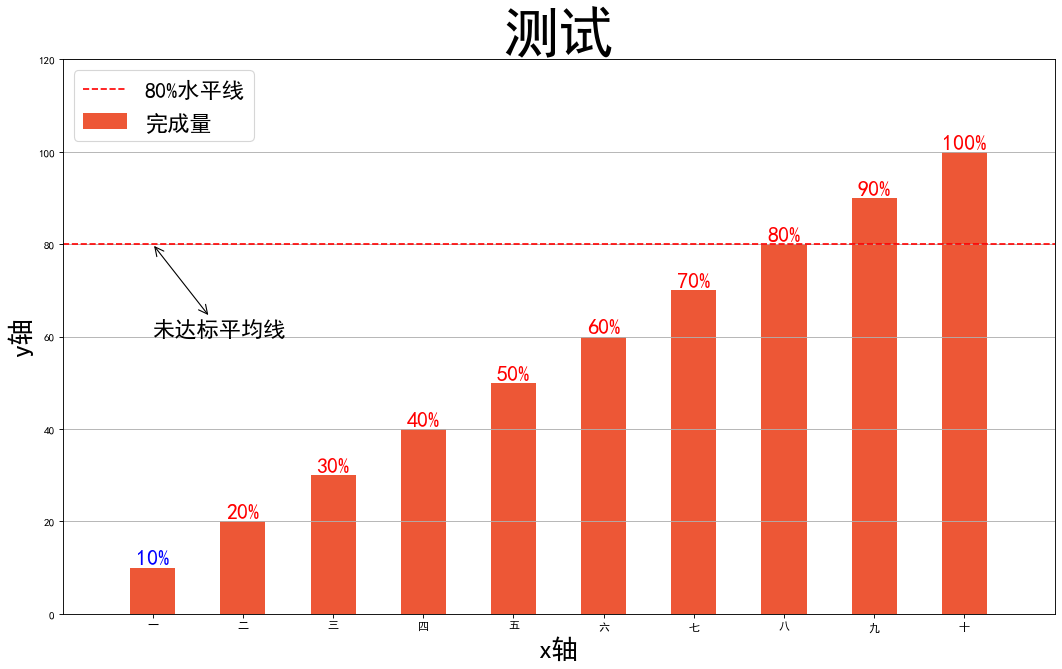

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
#mpl.rcParams['font.sans-serif'] = ['Songti SC'] #苹果电脑默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

y = np.arange(10, 101, 10)
x = np.arange(1, 11)
label = ["一", "二", "三", "四", "五", "六", "七", "八", "九", "十"]
plt.figure(figsize=(16, 9), dpi=80)
plt.bar(x, y, width=0.5, label="完成量", color="#ed5736")
plt.xticks(np.arange(1, 11, 1), label)
plt.title("测试", fontsize=50)

plt.text(1, 10, "10%", weight="bold", color="b", fontsize=20, ha="center", va="bottom")
plt.text(2, 20, "20%", weight="bold", color="r", fontsize=20, verticalalignment='bottom', horizontalalignment="center")
plt.text(3, 30, "30%", weight="bold", color="r", fontsize=20, verticalalignment='bottom', horizontalalignment="center")
plt.text(4, 40, "40%", weight="bold", color="r", fontsize=20, verticalalignment='bottom', horizontalalignment="center")
plt.text(5, 50, "50%", weight="bold", color="r", fontsize=20, verticalalignment='bottom', horizontalalignment="center")
plt.text(6, 60, "60%", weight="bold", color="r", fontsize=20, verticalalignment='bottom', horizontalalignment="center")
plt.text(7, 70, "70%", weight="bold", color="r", fontsize=20, verticalalignment='bottom', horizontalalignment="center")
plt.text(8, 80, "80%", weight="bold", color="r", fontsize=20, verticalalignment='bottom', horizontalalignment="center")
plt.text(9, 90, "90%", weight="bold", color="r", fontsize=20, verticalalignment='bottom', horizontalalignment="center")
plt.text(10, 100, "100%", weight="bold", color="r", fontsize=20, verticalalignment='bottom',horizontalalignment="center")
plt.annotate("未达标平均线", xy=(1, 80), arrowprops=dict(arrowstyle="<->"), fontsize=20, xytext=(1, 60))
plt.ylim(0, 120)
plt.xlim(0, 11)
plt.axhline(80, linestyle="--", color="r", label="80%水平线", )
plt.xlabel("x轴", fontsize=24)
plt.ylabel("y轴", fontsize=24)
plt.legend(loc="upper left", fontsize=20)
plt.grid( axis="y", )
plt.show() #可以了